In [1]:
import pandas as pd
url = "snp500gluon.csv"
df = pd.read_csv(url, header=0, index_col=0)

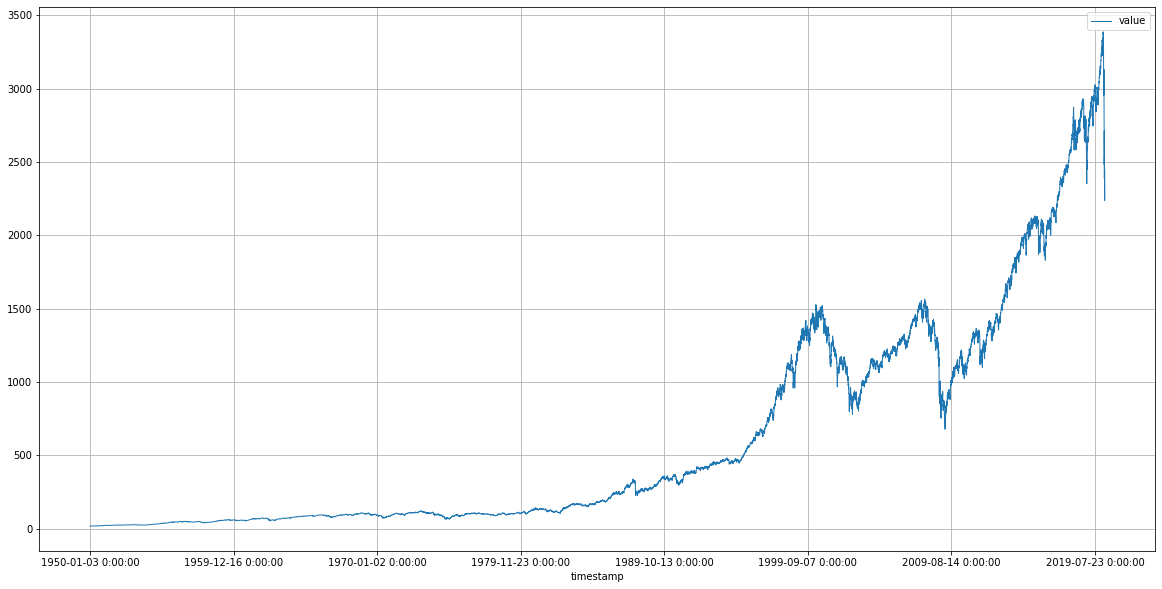

In [2]:
import matplotlib.pyplot as plt
df[:30000].plot(figsize=(20,10),linewidth=1)
plt.grid(which='both')
plt.show()

In [3]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2020-03-24 00:00:00"]}],
    freq = "24H"
)

In [4]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="24H", prediction_length=365, trainer=Trainer(epochs=2000))
predictor = estimator.train(training_data=training_data)

  0%|          | 0/50 [00:00<?, ?it/s]

learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


100%|██████████| 50/50 [00:45<00:00,  1.10it/s, epoch=97/2000, avg_epoch_loss=2.17]


100%|██████████| 50/50 [00:45<00:00,  1.10it/s, epoch=193/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:45<00:00,  1.10it/s, epoch=289/2000, avg_epoch_loss=2.1] 


100%|██████████| 50/50 [00:45<00:00,  1.10it/s, epoch=385/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:45<00:00,  1.11it/s, epoch=481/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:44<00:00,  1.13it/s, epoch=577/2000, avg_epoch_loss=2.09]


100%|██████████| 50/50 [00:44<00:00,  1.12it/s, epoch=673/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:44<00:00,  1.12it/s, epoch=769/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:44<00:00,  1.12it/s, epoch=865/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:45<00:00,  1.10it/s, epoch=961/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:47<00:00,  1.06it/s, epoch=1056/2000, avg_epoch_loss=2.04]


100%|██████████| 50/50 [00:46<00:00,  1.06it/s, epoch=1151/2000, avg_epoch_loss=2]   


100%|██████████| 50/50 [00:47<00:00,  1.06it/s, epoch=1246/2000, avg_epoch_loss=2.02]


100%|██████████| 50/50 [00:47<00:00,  1.05it/s, epoch=1341/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:46<00:00,  1.08it/s, epoch=1436/2000, avg_epoch_loss=2.09]


100%|██████████| 50/50 [00:46<00:00,  1.08it/s, epoch=1531/2000, avg_epoch_loss=2.06]


100%|██████████| 50/50 [00:46<00:00,  1.08it/s, epoch=1626/2000, avg_epoch_loss=2.04]


100%|██████████| 50/50 [00:47<00:00,  1.05it/s, epoch=1721/2000, avg_epoch_loss=2.02]


100%|██████████| 50/50 [00:45<00:00,  1.10it/s, epoch=1816/2000, avg_epoch_loss=2.01]


100%|██████████| 50/50 [00:44<00:00,  1.11it/s, epoch=1911/2000, avg_epoch_loss=2.01]


100%|██████████| 50/50 [00:44<00:00,  1.11it/s, epoch=2000/2000, avg_epoch_loss=2.09]


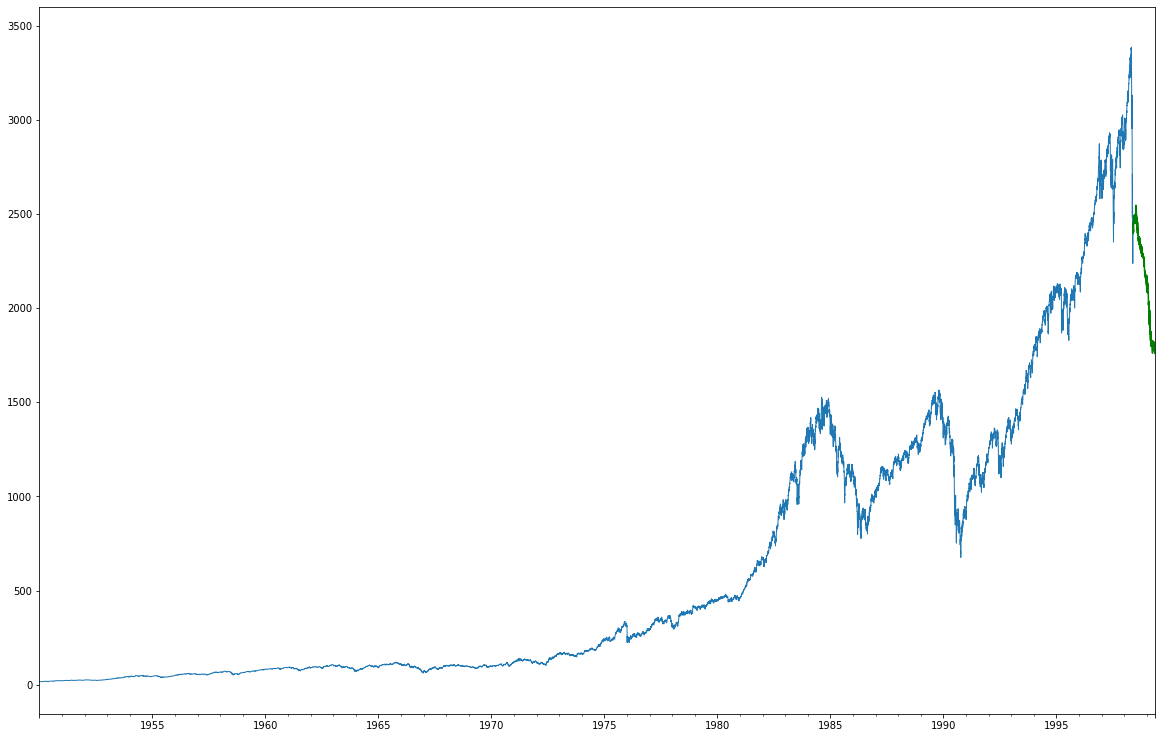

In [12]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2020-03-25 00:00:00"]}],
    freq = "24H"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-30000:].plot(figsize=(20,13),linewidth=1)
    forecast.plot(color='g', prediction_intervals=[100.0, 100.0])
plt.plot(which='both')
plt.show()


In [15]:
print(predictor.predict(test_data))

<generator object GluonPredictor.predict at 0x12c7ddc50>
